# Motion of a carged particle in the field of a magnetic dipole.
## Numerically computing the orbits of electrons in a external dipolar magnetic field configuration.

The reference for this motion is: --Trapped Orbits in a Magnetic Dipole Field--, A. J. Dragt, Review of Geophysics, Vol. 3, Number 2, (1965), and --Global aspects of charged particle motion in axially symmetric multipole magnetic fields--, John V. Shebalin.

The charge particle Lagrangian for a field with azimuthal symmetry is given by:

\begin{equation}
\mathcal{L} = -mc^2\sqrt{1-v^2/c^2} + \frac{e}{c}A(r,\theta)r\sin{\theta} v^{\phi},
\end{equation}

where $A$ is the $z$ component of the vector potential. 
Recall that in these coordinates we have, $v^2 = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2\sin^2(\theta) \dot{\phi}^2$.
It is convenient to redefine $A \to A/c$ $m=1$, $e \to e/m$, to get rid of irelevant parameters.

Since the Lagrangian does not depend on time the energy is conserved. For this case, without and electrostatic potential, it is given by:

\begin{equation}
H = \frac{c^2}{ \sqrt{1-v^2/c^2}} = \gamma c^2.
\end{equation}
Thus, the speed is conserved along the motion. On the other hand, the azimuthal symmetry also implies the particle angular momentum is also conserved, 

\begin{equation}
P := \frac{\partial \mathcal{L}}{\partial \dot{\phi}} = \frac{\dot{\phi} r^2 \sin^2{\theta} }{\sqrt{1-v^2/c^2} }+ e A(r,\theta) r \sin{\theta}  = \gamma \dot{\phi} r^2 \sin^2{\theta} + e A(r,\theta) r \sin{\theta}
\end{equation}

In spherical coordinates the complete system of equations becomes:

\begin{eqnarray*}
\frac{\partial \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}} \;\;\;\;\;\;\; h = [\frac{P}{r\sin{\theta}} - e A] \\
\frac{\partial \dot{r}}{dt} &=& e \frac{1}{ \gamma}\frac{\partial(rA)}{\partial r} \sin{\theta} \dot{\phi} + \frac{v^2 - \dot{r}^2}{r} \\
\frac{\partial \dot{\theta}}{dt} &=& [\frac{e}{\gamma} \frac{1}{r}\frac{\partial(\sin{\theta}A)}{\partial\theta} + \sin{\theta}\cos{\theta} \dot{\phi}]\dot{\phi} - 2\frac{\dot{r}}{r}\dot{\theta}
\end{eqnarray*}

Since the energy conservation implies the conservation of $v^2$, using the expression for the angular momentum we obtain,

\begin{equation}
v^2 = \dot{r}^2 + r^2 \dot{\theta}^2 + r^2 \sin^2{\theta} \dot{\phi}^2 \;\;\;\;\;  \dot{r}^2 + r^2 \dot{\theta}^2 = v^2 - \frac{h^2}{\gamma^2} .
\end{equation}

Therefore the movement is only possible when $h^2 = [\frac{P}{r\sin{\theta}} - e A]^2 < v^2\gamma^2$. 

For a generic multipole we have, 
\begin{equation}
A(r,\theta) = \frac{a_n}{r^{n+1}}P^1_n(\cos{\theta}).
\end{equation}


## The dipolar case.

For this case, $P^1_1(\cos{\theta}) = -\sin(\theta)$.

Defining $e a_1 = a_0$, 

\begin{eqnarray*}
\frac{d \phi}{dt} &=& \frac{h}{\gamma r\sin{\theta}}  \\
\frac{d \dot{r}}{dt} &=&  \frac{1}{\gamma}\frac{a_0}{r^2} \sin^2{\theta} \dot{\phi} + \frac{v^2 - \dot{r}^2}{r} \\
\frac{d \dot{\theta}}{dt} &=& [- \frac{2a_0}{\gamma r^3} +  \dot{\phi}]\dot{\phi}\sin{\theta}\cos{\theta}  - 2\frac{\dot{r}}{r}\dot{\theta} \\
\frac{d \theta}{dt} &=& \dot{\theta} \\
\frac{d r}{dt} &=& \dot{r} \\
\end{eqnarray*}

Where,
\begin{equation}
v^2 = \frac{\dot{r}^2 + r^2 \dot{\theta}^2 + h^2}{1+h^2}, \;\;\;\;\;\;\; h = [\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} ]
\end{equation}
is constant along the motion.

Thus we only need to solve for $U = (r, \dot{r}, \theta, \dot{\theta})$, but we also solve along for $\phi$ so that we can easely plot the solutions. Thus our vector solution is:  $U = (r, \dot{r}, \theta, \dot{\theta}, \phi)$.

In [1]:
using OrdinaryDiffEq
#using Interact
using Plots

#Plots.PlotlyBackend()
#using ImageMagick (sometimes needed for animations)
#using PyPlot
#ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

Here we put some of the parameters that enter the equations. For slow particles (simpler to evolve, but with all the complexity) $a = 0.1$, $pert = 0.01$, $T=6000-20000$, $Tol = 10^{-8}$. For faster particles (harder to evolve) $a = 1.0$, $pert = 0.1$, $T=200-400$, $Tol = 10^{-10}$. The fastest is $a = 10.0$, $pert = 0.8$, $T=10-20$, $Tol = 10^{-12}$. This is very hard for the integrator we are using. I recomment to play with the slowest one, it has a nicer structure.

In [2]:
slow_p = true
fast_p = false

if  fast_p
    a = 10.0  # field amplitude (reescaled with e, m and c)
    pert = 0.8 # off plane perturbation for faster particles
    T = 20. #integration time
    # maximum step error on the integration
    reltol=1e-12 #relative error
    abstol=1e-12 #absolute error
    elseif slow_p
    a = 1.
    pert = 0.1 #
    T = 800
    reltol=1e-8
    abstol=1e-8
end

p = -1. * a # angular momentum (reescaled with m and a). 

-1.0

Next we give the initial conditions. We start from the equatorial plane, at $r=1$. With no radial velocity. The off-plane velocity is small, and is given by the pert parameter. The $\phi$ velocity is obtained from the value of the given angular momentum. Thus, we know the total velocity after wards, and we need to check it is smaller that the speed of light!

In [3]:
ρ_0 = 1.  # initial radius
#ρ_t_0 = -0.02
ρ_t_0 = -0.0 #initial radial velocity

#initial azimuthal position and velocity
θ_0 = pi/2.0
θ_t_0 = pert

#initial angle
ϕ_0 = 0

#With these quantities we build the total velocity 
#(since we are giving apriory the angular momentum)

h0 = (p/ρ_0/sin(θ_0) + a*sin(θ_0)/ρ_0/ρ_0)
h20 = h0*h0
v2 = (ρ_t_0*ρ_t_0 + ρ_0*ρ_0*(θ_t_0*θ_t_0) + h20) / (1. + h20)

println("v^2 = ", v2)
#we check that it is not inconsistent.
if (v2 > 0.99)
    println("Speed too high! v2=%f", v2)
    exit()
end
#like v2, gamma is also a motion constant so we set it here
γ = sqrt(1. - v2)                        

#The final initial data is then:

u_0 = [ρ_0; ρ_t_0; θ_0; θ_t_0; ϕ_0]

v^2 = 0.010000000000000002


5-element Vector{Float64}:
  1.0
 -0.0
  1.5707963267948966
  0.1
  0.0

We now plot the regions $h^2 - 1 = constant = [\frac{P}{r\sin{\theta}} + \frac{a_0}{r^2}\sin{\theta} ]^2 - 1$ to see where are the bounded, and possible, propagation regions. Namely those regions for wich $h^2 - 1 < 0$

In polar coordinates the system becomes:



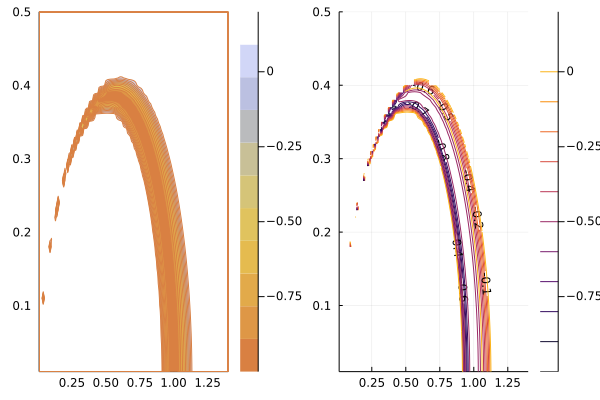

In [4]:
gr()
x = 0.01:0.01:1.40 #this is rho 
y = 0.01:0.01:0.50 # this is z
h(x, y) = begin
    r = sqrt(x^2+y^2) # x = x y = z
    if (p/x + a * x /r^3)^2/v2/γ^2 - 1. > 0.2 return 0.2
    else 
    return (p/x + a * x /r^3)^2/v2/γ^2 -1.
    end
    end
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(h, X, Y)
#levels = 50
levels = 0.0:-0.1:-1.
#levels = [0.,-0.01,-0.02]
p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad(:beach))
#p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad([:orange, :blue], [-0.1, -0.3, -1.]))
p2 = contour(x, y, Z, levels = levels, contour_labels = true)

#plot(p1)
plot(p1,p2)
#h(1,0) # this is the place where we give the initial data por position
#show(plot(p2))

The values for which $h^2$ is minimum corresponds to the line $r = \frac{a}{p}\sin(\theta)^2$. Perturbations around that line would move close to it. 
They would spiral more and more to the region of larger magnetic field until stopping and returning again, while they do it, they would also spiral around. 

We can see the outside (unbounded region) too. 

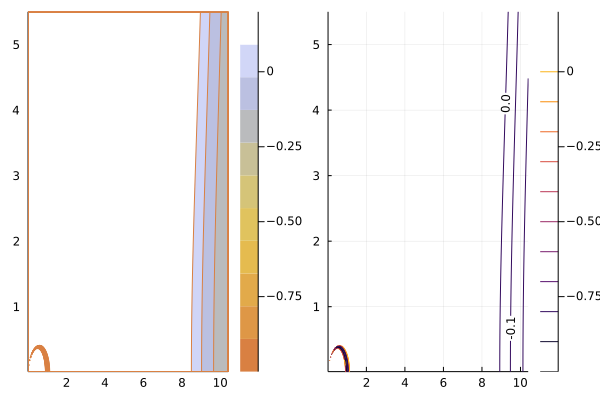

In [5]:
x = 0.01:0.01:10.40 #this is rho 
y = 0.01:0.01:5.50 # this is z
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(h, X, Y)
#levels = 50
levels = 0.0:-0.1:-1.
#levels = [0.,-0.01,-0.02]
p3 = contour(x, y, h, fill = true, levels = 10, c = cgrad(:beach))
#p1 = contour(x, y, h, fill = true, levels = 10, c = cgrad([:orange, :blue], [-0.1, -0.3, -1.]))
p4 = contour(x, y, Z, levels = levels, contour_labels = true)

plot(p3,p4)

In [6]:
function f(du,u,par,t)
    sint = sin(u[3])
    cost = cos(u[3])
    ϕ_t = (p/u[1]/sint + a/u[1]/u[1]*sint)/u[1]/sint/γ
    du[1] = u[2]
    du[2] = a/u[1]/u[1]*sint*sint*ϕ_t/γ
    du[3] = u[4]
    du[4] = (-2. * a/u[1]/u[1]/u[1]/γ + ϕ_t)*ϕ_t*sint*cost - 2. * u[2]*u[4]/u[1]
    du[5] = ϕ_t
end 

f (generic function with 1 method)

In [7]:
par = (a,p)
tspan = (0., T)

(0.0, 800)

In [8]:
prob = ODEProblem(f,u_0,tspan,p);

We use an algorithm that detects when the system becomes stiff and changes accordingly. 

In [9]:
tsidas_alg = AutoTsit5(Rodas5())
@time sol = solve(prob, tsidas_alg, reltol=reltol, abstol=abstol, maxiters=1e7);
#@time sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

  8.317569 seconds (60.18 M allocations: 1.964 GiB, 6.68% gc time, 0.04% compilation time)


In [10]:
sphere_to_car(ρ,θ,ϕ) = (ρ*sin(θ)*sin(ϕ),ρ*sin(θ)*cos(ϕ),ρ*cos(θ))
function s2c!(ρ,θ,ϕ)::Array
    x=zeros(3)
    x[1] = ρ*sin(θ)*sin(ϕ)
    x[2] = ρ*sin(θ)*cos(ϕ)
    x[3] = ρ*cos(θ)
    return x
end

s2c! (generic function with 1 method)

In [12]:
plotly()
#gr()
#esto no parece funcionar bien.

#plot(sol,vars=(sphere_to_car,1,3,5),tspan=(0.0,T),linewidth=1,title="Trayectories in a dipole field",
#     xlim = (-1.2, 1.2),ylim = (-1.2, 1.2),zlim = (-0.6, 0.6),xaxis="x",yaxis="y",zaxis="z",label="electrons",show=true)

Plots.PlotlyBackend()

In [13]:
N = 1000
dT = T/N
X = zeros(N,3)
ts = 0
#X[1,:] = s2c!(sol(ts,idxs=1),sol(ts,idxs=3),sol(ts,idxs=5))
#plot(X[:,1], X[:,2], X[:,3])

0

┌ Info: Saved animation to 
│   fn = C:\Users\LENOVO\CursoPDE\2021\Numericos\Tarea_1\Dipolo_mag_3d\dipole_slow_fps20.gif
└ @ Plots C:\Users\LENOVO\.julia\packages\Plots\HcxwM\src\animation.jl:114


Plots.AnimatedGif("C:\\Users\\LENOVO\\CursoPDE\\2021\\Numericos\\Tarea_1\\Dipolo_mag_3d\\dipole_slow_fps20.gif")
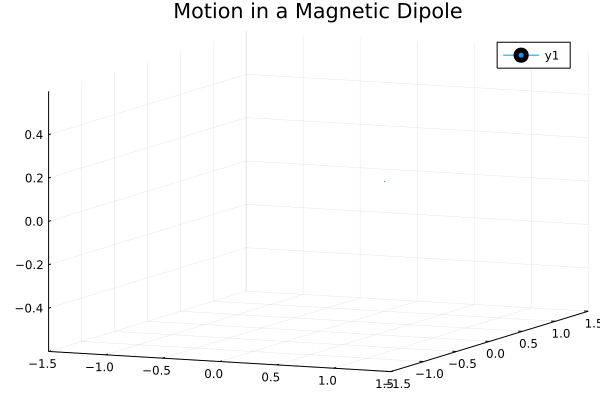

In [14]:
using Plots
gr()
plt = plot3d(
    1,
    xlim = (-1.5, 1.5),
    ylim = (-1.5, 1.5),
    zlim = (-0.6, 0.6),
    title = "Motion in a Magnetic Dipole",
    marker = 1,
)
anim = @animate for i in 1:N
    ts = dT*(i-1)
    X[i,:] = s2c!(sol(ts,idxs=1),sol(ts,idxs=3),sol(ts,idxs=5))
    push!(plt, X[i,1], X[i,2], X[i,3])
    end every 1
gif(anim, "dipole_slow_fps20.gif", fps = 20)


La animación que sigue debería andar pero consume muchos recursos. Trate de no usarla...

In [14]:
#gr()
#animate(sol,"dipole.gif",vars=(sphere_to_car,1,3,5),tspan=(0.0,T/100),linewidth=1,title="Trayectories in a dipole field",
#     xlim = (-1.2, 1.2),ylim = (-1.2, 1.2),xaxis="x",yaxis="y",zaxis="z",label="electrons",every=4)